## Gradient Descent 
The standard linear regression solver in `sklearn` uses a closed form solution to find the parameters (using matrix operations), see: http://mathworld.wolfram.com/Closed-FormSolution.html.  
However, `sklearn` aslo includes a (Stochastic) Gradient Descent implementation. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
weight_pd = pd.read_csv('weightV2.csv')
weight_pd.head()

,Weight,Waist
0,154.25,85.2
1,173.25,83.0
2,154.00,87.9
3,184.75,86.4
4,184.25,100.0


In [2]:
y = weight_pd.pop('Weight').values
X = weight_pd.values
X.shape

(251, 1)

It is important to scale data before using SGD

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)  
X = scaler.transform(X)

In [4]:
slopes_d = {}
intercepts_d = {}
rsq_d = {}
iters =range(1,10) # We look at the first 6 iterations of the GD process

The strategy is to run SGD multiple times with 1, then 2 then 3 iterations etc.  
The warning messages are because the algorithm is not getting to converge.

In [5]:
n_iter = 5
eta_vals = [0.002, 0.004, 0.01]

for e0 in eta_vals:
    slopes = [None]
    intercepts = [None]
    rsq = [None]
    for i in range(1, n_iter+1):
        reg = SGDRegressor(max_iter=i, learning_rate = 'constant', 
                       eta0 = e0, random_state=int(e0*2600)).fit(X, y)
        slopes.append(reg.coef_[0])
        intercepts.append(reg.intercept_[0])
        rsq.append(reg.score(X, y))
        print(i, ' R squared statistic: {:.2f}'.format(rsq[i]))
        print(' Slope: {:.2f}'.format(slopes[i]))
        print(' Intercept: {:.2f}'.format(intercepts[i]))
    slopes_d[e0] = slopes
    intercepts_d[e0] = intercepts
    rsq_d[e0] = rsq

1  R squared statistic: -15.47
 Slope: 9.31
 Intercept: 70.42
2  R squared statistic: -5.18
 Slope: 15.01
 Intercept: 112.95
3  R squared statistic: -1.41
 Slope: 18.44
 Intercept: 138.74
4  R squared statistic: -0.04
 Slope: 20.44
 Intercept: 154.27
5  R squared statistic: 0.48
 Slope: 21.79
 Intercept: 163.81
1  R squared statistic: -5.15
 Slope: 14.87
 Intercept: 113.15
2  R squared statistic: -0.02
 Slope: 20.62
 Intercept: 154.45
3  R squared statistic: 0.66
 Slope: 22.54
 Intercept: 169.34
4  R squared statistic: 0.75
 Slope: 22.94
 Intercept: 175.12
5  R squared statistic: 0.76
 Slope: 23.47
 Intercept: 177.08
1  R squared statistic: 0.48
 Slope: 21.27
 Intercept: 164.01
2  R squared statistic: 0.76
 Slope: 22.41
 Intercept: 175.92
3  R squared statistic: 0.76
 Slope: 23.91
 Intercept: 177.73
4  R squared statistic: 0.76
 Slope: 23.00
 Intercept: 179.07
5  R squared statistic: 0.76
 Slope: 23.55
 Intercept: 178.56


/opt/anaconda3/envs/AI/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/AI/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/AI/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/AI/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/AI/l

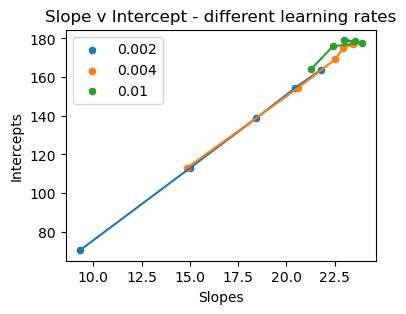

In [6]:
plt.figure(figsize=(4,3))
for e0 in eta_vals:
    plt.plot(slopes_d[e0], intercepts_d[e0])
    plt.scatter(slopes_d[e0], intercepts_d[e0], s = 20, label = e0)
    plt.xlabel('Slopes')
plt.ylabel('Intercepts')
plt.title ('Slope v Intercept - different learning rates' )
plt.legend()
plt.show()

In [7]:
lr = 0.004
print("Slope, Intrcpt, R2")
for step in range(1, n_iter+1):
    print('{:.1f}, {:6.1f}, {:5.2f}'.format(slopes_d[lr][step],
                                  intercepts_d[lr][step], rsq_d[lr][step]))

Slope, Intrcpt, R2
14.9,  113.1, -5.15
20.6,  154.5, -0.02
22.5,  169.3,  0.66
22.9,  175.1,  0.75
23.5,  177.1,  0.76


### Plot the progress of the SGD through the solution space
The model has two parameters (slope and intercept) so we have a 2D solution space.  
Ok, we are restarting the SGD multiple times so this is not a true SGD track.

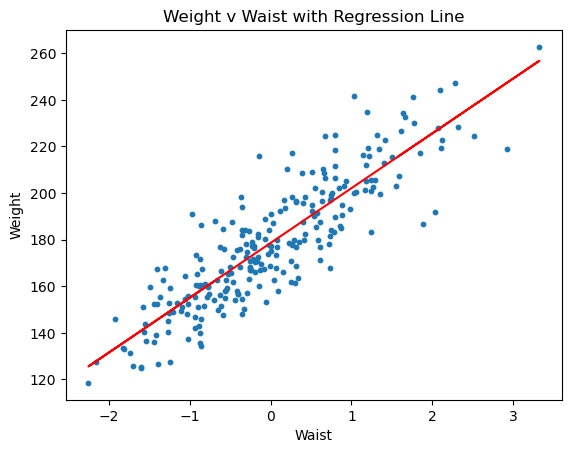

In [8]:
Y_pred = reg.predict(X)

plt.scatter(X, y, s = 10)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Waist')
plt.ylabel('Weight')
plt.title ('Weight v Waist with Regression Line' )
plt.savefig('2D-1D.png')
plt.show()

In [9]:
# A function to calculate two y values for two values of x - used in the plots.
def lin_reg(s,ic,x1,x2):
    y1 = ic + s * x1
    y2 = ic + s * x2
    return y1,y2

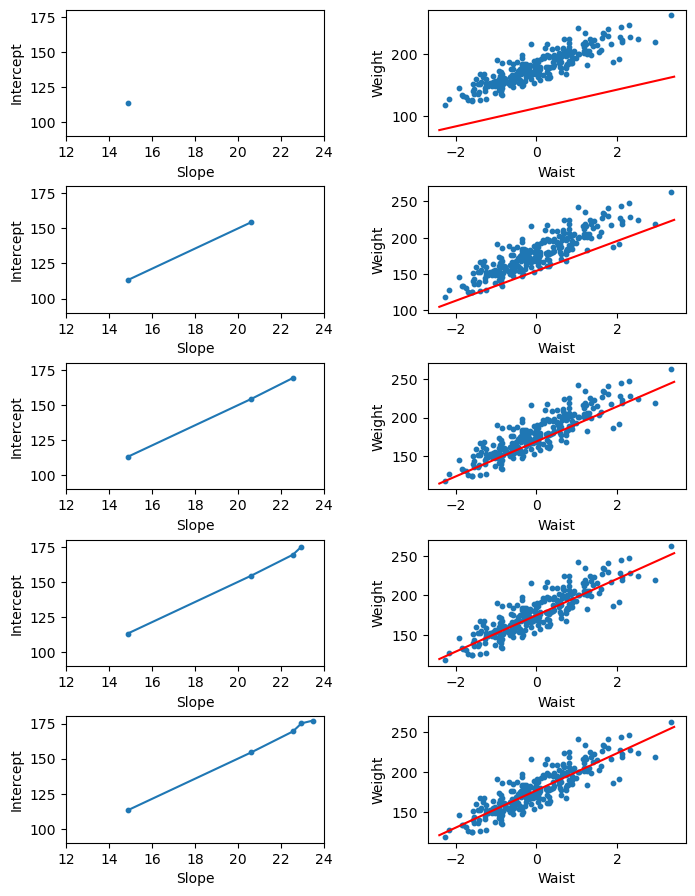

In [10]:
x_min = -2.4
x_max = 3.4
x_lims = [12,24]
y_lims = [90,180]
slopes = slopes_d[0.004]
intercepts = intercepts_d[0.004]

fig = plt.figure(figsize=(8,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i = 0
for step in range(1, n_iter+1):
    i += 1
    ax1 = fig.add_subplot(len(iters), 2, i)
    ax1.plot(slopes[:step+1], intercepts[:step+1])
    ax1.scatter(slopes[:step+1], intercepts[:step+1], s = 10)
    ax1.set_xlabel('Slope')
    ax1.set_ylabel('Intercept')
    ax1.set_xlim(x_lims)
    ax1.set_ylim(y_lims)

    i += 1
    ax2 = fig.add_subplot(len(iters), 2, i)
    ax2.scatter(X, y, s = 10)
    ax2.set_xlabel('Waist')
    ax2.set_ylabel('Weight')
    y1,y2 = lin_reg(slopes[step],intercepts[step], x_min, x_max)
    ax2.plot([x_min, x_max], [y1,y2], color='red')

## Random Guessing

In [11]:
from random import uniform
x_min = -2.4
x_max = 3.4
x_lims = [12,23]
y_lims = [90,180]


In [12]:
slopes = [None]
intercepts = [None]

for i in iters:
    s = uniform(-x_lims[1],x_lims[1])
    intcp = uniform(y_lims[0],y_lims[1])
  
    slopes.append(s)
    intercepts.append(intcp)
    print(' Slope: {:.2f}'.format(slopes[i]))
    print(' Intercept: {:.2f}'.format(intercepts[i]))

 Slope: 20.40
 Intercept: 145.24
 Slope: 1.85
 Intercept: 99.93
 Slope: 5.01
 Intercept: 167.26
 Slope: 16.47
 Intercept: 120.38
 Slope: -15.08
 Intercept: 92.65
 Slope: -17.85
 Intercept: 156.73
 Slope: 5.48
 Intercept: 107.65
 Slope: -4.47
 Intercept: 110.94
 Slope: -22.25
 Intercept: 137.29


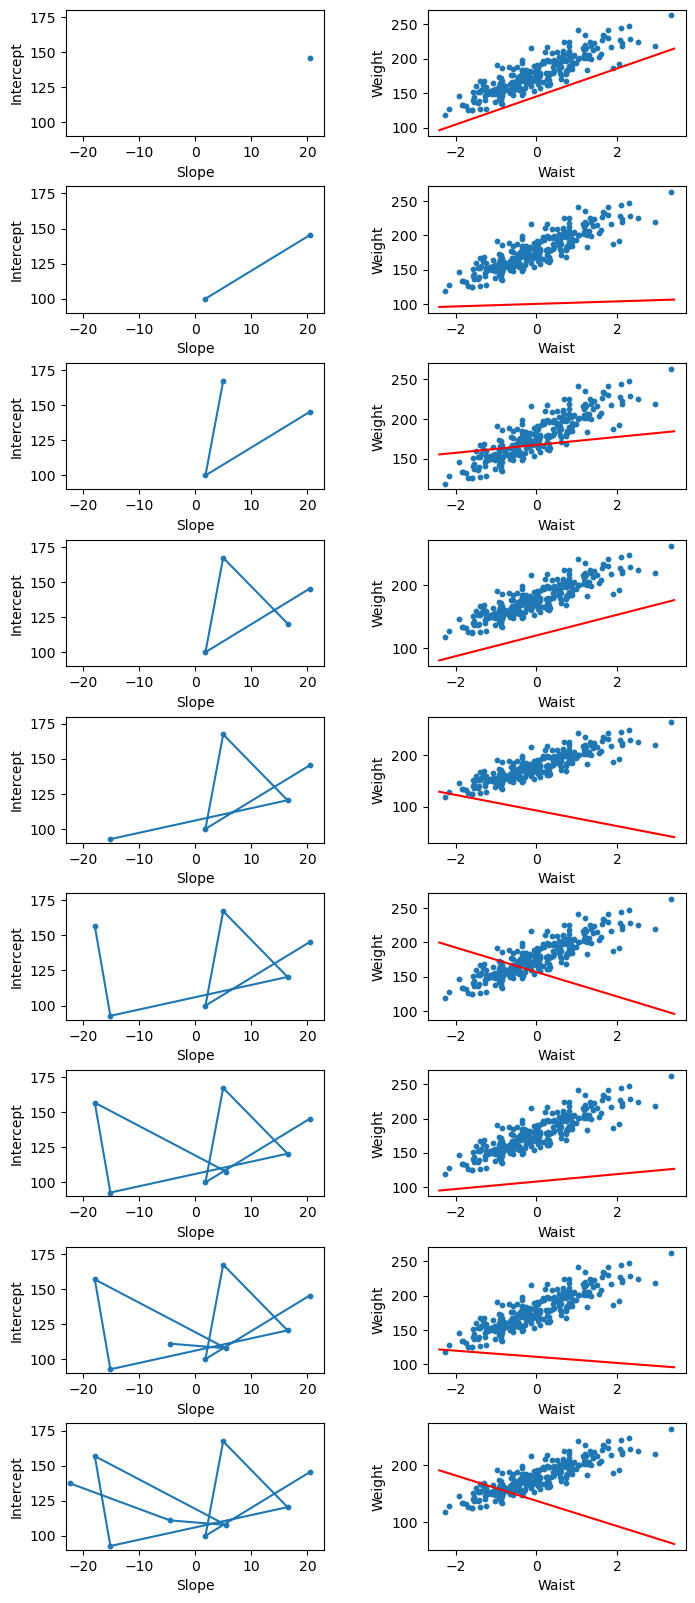

In [13]:
fig = plt.figure(figsize=(8,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i = 0
for step in iters:
    i += 1
    ax1 = fig.add_subplot(len(iters), 2, i)
    ax1.plot(slopes[:step+1], intercepts[:step+1])
    ax1.scatter(slopes[:step+1], intercepts[:step+1], s = 10)
    ax1.set_xlabel('Slope')
    ax1.set_ylabel('Intercept')
    ax1.set_xlim(-x_lims[1],x_lims[1])
    ax1.set_ylim(y_lims)

    i += 1
    ax2 = fig.add_subplot(len(iters), 2, i)
    ax2.scatter(X, y, s = 10)
    ax2.set_xlabel('Waist')
    ax2.set_ylabel('Weight')
    y1,y2 = lin_reg(slopes[step],intercepts[step], x_min, x_max)
    ax2.plot([x_min, x_max], [y1,y2], color='red')

## 2D Plot
The objective here is to create a contour plot of the model scores (R2) against different slope and intercept values.  
The model has just two parameters so we can plot the parameter space in 2D. 
We decide the ranges we plan to plot:
- slopes from -50 to +50
- intercepts from 50 to 250  

When we fit a model we see that values for these parameters are ~24 and ~178 respectively.

In [14]:
reg = SGDRegressor().fit(X, y)
s = reg.coef_[0]
intercept = reg.intercept_[0]
s, intercept

(23.614521607904813, 178.1755480143167)

In [15]:
# R2 score
reg.score(X,y)

0.7643419855758186

In [16]:
def mscore(sl, intcp):
    global res
    reg.coef_[0] = sl
    reg.intercept_[0] = intcp
    return reg.score(X,y)

def escore(sl, intcp):
    global res
    reg.coef_[0] = sl
    reg.intercept_[0] = intcp
    y_pred = reg.predict(X)
    return mean_squared_error(y, y_pred)

In [17]:
mscore(25, 180), escore(25,180)

(0.7571082721056683, 176.81754960862347)

In [18]:
sl_steps = 100  #cols
int_steps = 120 #rows
slopes = np.linspace(-50, 50, sl_steps)
intercepts = np.linspace(50, 250, int_steps)
scores = np.zeros((int_steps,sl_steps))

for intind, intc in enumerate(intercepts):
    for sind, sl in enumerate(slopes):
        scores[intind, sind] = mscore(sl, intc)

Text(0.5, 1.0, 'Score (R2)')

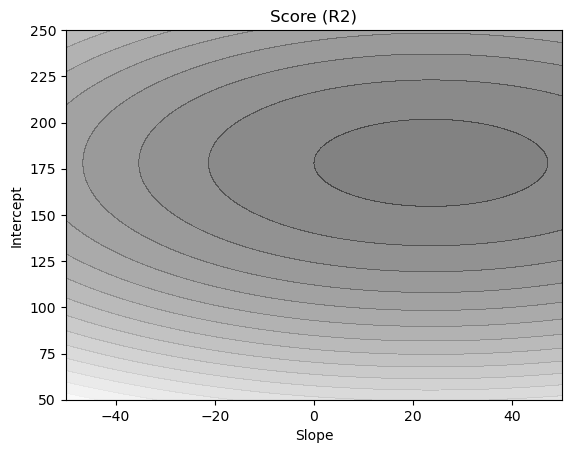

In [19]:
plt.contourf(slopes, intercepts ,scores,15,
                cmap ='binary',
                  alpha = 0.5)
plt.xlabel('Slope')
plt.ylabel('Intercept')
plt.title('Score (R2)')